In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

import matplotlib.pyplot as plt
import numpy as np
import distributions
import sys

In [30]:
mean = 1000
Gini = 0.33

truedists = [
    distributions.LognormalIncomeDistribution(mean = mean, Gini = Gini),
    distributions.TriangleIncomeDistribution(minimum = 0, maximum = mean * 2.5, mean = mean)
]
ygrid = np.linspace(0, np.max([truedist.quantile(0.999) for truedist in truedists]), 100)

Ns = [500, 1000, 2000, 5000, 10000, 20000]
Ps = [11, 21, 101]
ss = [-3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]

#Ns = [1000, 2000, 5000]
#Ps = [21, 101]
#ss = [-3, -2, -1, 0, 1, 2, 3]

M = 20

errsum = dict()
for truedist in truedists:
    dname = truedist.__class__.__name__
    print("Dist:", dname)
    errsum[dname] = dict()
    for N in Ns:
        print("N",N)
        errsum[dname][N] = dict()
        for P in Ps:
            print(" P",P)
            errsum[dname][N][P] = dict()
            for s in ss:
                errsum[dname][N][P][s] = 0
            for m in range(M):
                sys.stdout.write("  M {}/{}".format(m+1,M))
                p, L = truedist.generate_lorenz_points(N, P)
                for s in ss:
                    sys.stdout.write('.')
                    dist = distributions.TransformedSplineIncomeDistribution(
                        mean, p, L,
                        distributions.LognormalIncomeDistribution,
                        s = s
                    )
                    dist_pdf_p = dist.pdf(ygrid)
                    true_pdf_p = truedist.pdf(ygrid)
                    err = np.sum(np.power(dist_pdf_p - true_pdf_p, 2))
                    errsum[dname][N][P][s] += err
                print()


Dist: LognormalIncomeDistribution
N 500
 P 11
  M 1/20...............
  M 2/20...............
  M 3/20...............
  M 4/20...............
  M 5/20...............
  M 6/20...............
  M 7/20...............
  M 8/20...............
  M 9/20...............
  M 10/20...............
  M 11/20...............
  M 12/20...............
  M 13/20...............
  M 14/20...............
  M 15/20...............
  M 16/20.

/usr/local/lib/python3.5/site-packages/scipy/interpolate/fitpack2.py:222: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


..............
  M 17/20...............
  M 18/20...............
  M 19/20...............
  M 20/20...............
 P 21
  M 1/20...............
  M 2/20...............
  M 3/20...............
  M 4/20...............
  M 5/20...............
  M 6/20...............
  M 7/20...............
  M 8/20...............
  M 9/20...............
  M 10/20...............
  M 11/20...............
  M 12/20...............
  M 13/20...............
  M 14/20...............
  M 15/20...............
  M 16/20...............
  M 17/20...............
  M 18/20...............
  M 19/20...............
  M 20/20...............
 P 101
  M 1/20...............
  M 2/20...............
  M 3/20...............
  M 4/20...............
  M 5/20...............
  M 6/20...............
  M 7/20...............
  M 8/20..

/Users/andrew/Documents/Ideas/povcaljson/notebooks/distributions.py:156: RuntimeWarning: invalid value encountered in double_scalars
  return scipy.stats.norm.pdf(norm_quant_p - self.sigma) / scipy.stats.norm.pdf(norm_quant_p)


.............
  M 9/20...............
  M 10/20...............
  M 11/20...............
  M 12/20...............
  M 13/20...............
  M 14/20...............
  M 15/20...............
  M 16/20...............
  M 17/20...............
  M 18/20...............
  M 19/20...............
  M 20/20...............
N 1000
 P 11
  M 1/20...............
  M 2/20...............
  M 3/20...............
  M 4/20...............
  M 5/20...............
  M 6/20...............
  M 7/20...............
  M 8/20...............
  M 9/20...............
  M 10/20...............
  M 11/20...............
  M 12/20...............
  M 13/20...............
  M 14/20...............
  M 15/20...............
  M 16/20...............
  M 17/20...............
  M 18/20...............
  M 19/20...............
  M 20/20...............
 P 21
  M 1/20...............
  M 2/20...............
  M 3/20...............
  M 4/20...............
  M 5/20...............
  M 6/20...............
  M 7/20...............
  M 8/20.

/usr/local/lib/python3.5/site-packages/scipy/interpolate/fitpack2.py:222: UserWarning: 
A theoretically impossible result was found during the iteration
proces for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


............
  M 7/20...............
  M 8/20...............
  M 9/20...............
  M 10/20...............
  M 11/20...............
  M 12/20...............
  M 13/20...............
  M 14/20...............
  M 15/20...............
  M 16/20...............
  M 17/20...............
  M 18/20...............
  M 19/20...............
  M 20/20...............
N 1000
 P 11
  M 1/20...............
  M 2/20...............
  M 3/20...............
  M 4/20...............
  M 5/20...............
  M 6/20...............
  M 7/20...............
  M 8/20...............
  M 9/20...............
  M 10/20...............
  M 11/20...............
  M 12/20...............
  M 13/20...............
  M 14/20...............
  M 15/20...............
  M 16/20...............
  M 17/20...............
  M 18/20...............
  M 19/20...............
  M 20/20...............
 P 21
  M 1/20...............
  M 2/20...............
  M 3/20...............
  M 4/20...............
  M 5/20...............
  M 6/20..

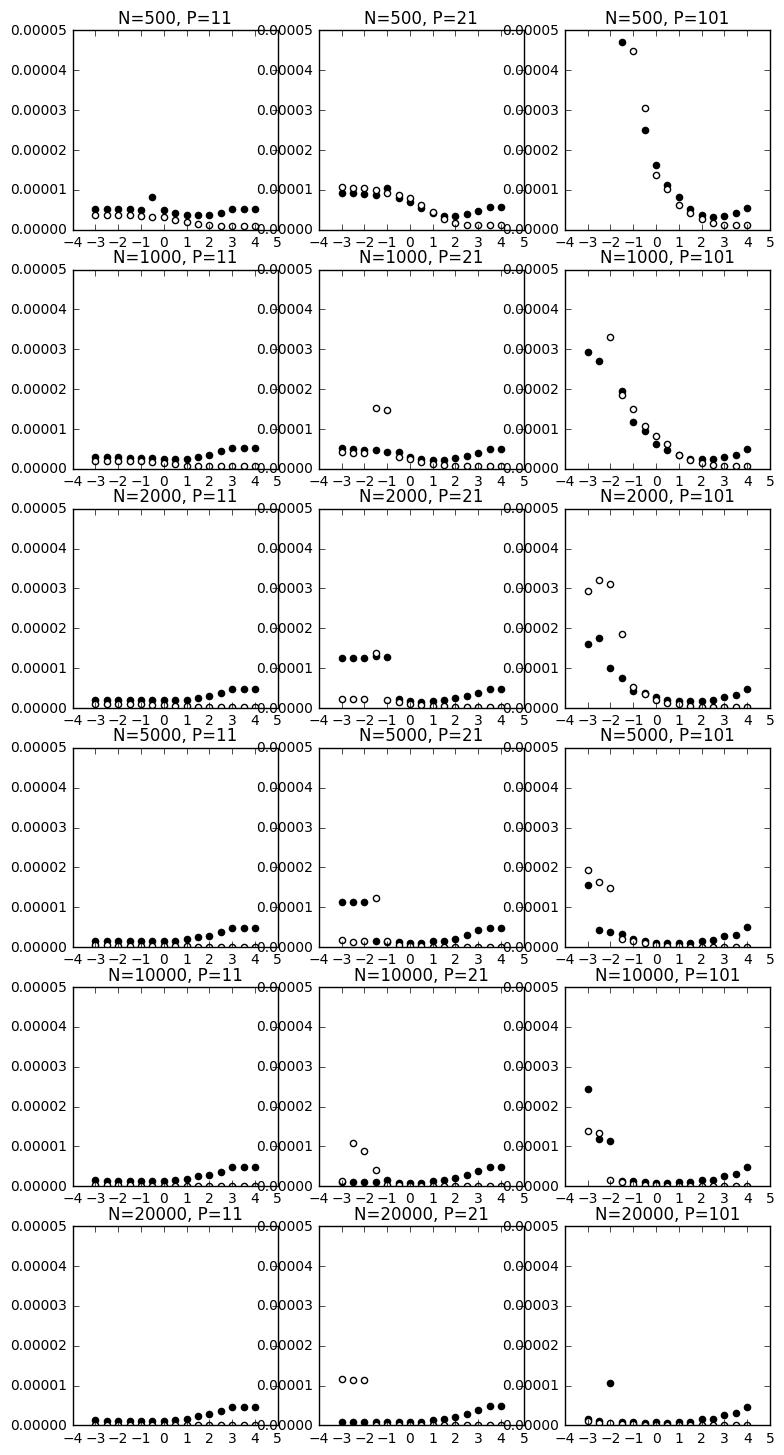

In [40]:
##########################################
plt.rcParams["figure.figsize"] = (len(Ps)*3, len(Ns)*3)
fig, ax = plt.subplots(len(Ns), len(Ps))
##########################################

for c,d in enumerate(errsum.values()):
    for i,N in enumerate(Ns):
        for j,P in enumerate(Ps):
            ax[i, j].scatter(list(d[N][P].keys()), list(d[N][P].values()), c=str(c))
            ax[i, j].set_ylim(0,5e-5) #2
            ax[i ,j].set_title("N={}, P={}".format(N, P))

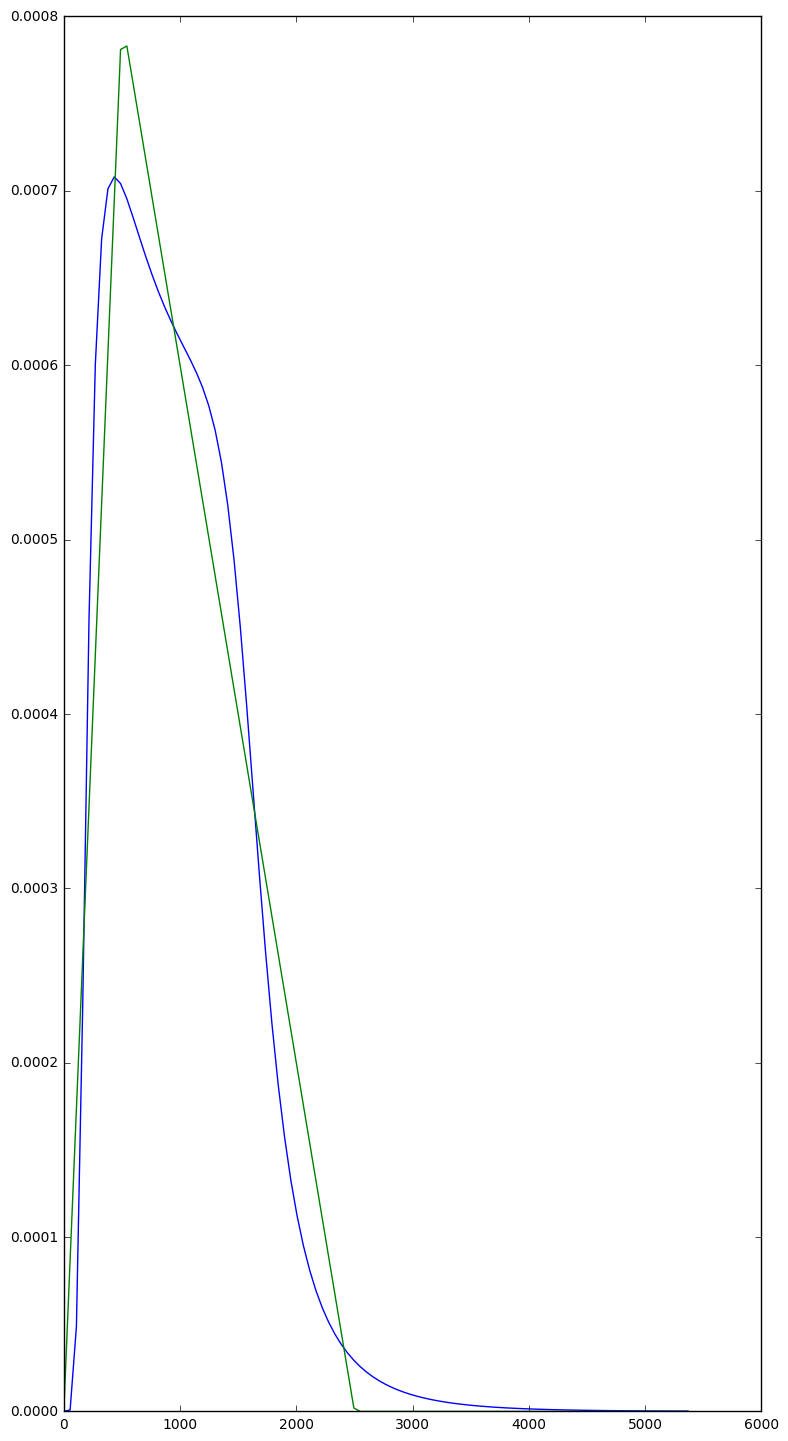

In [41]:
plt.plot(ygrid, dist.pdf(ygrid))
plt.plot(ygrid, truedist.pdf(ygrid))
#distributions.TriangleIncomeDistribution(minimum = 0, maximum = 2500, mean = 1000).c

In [34]:
import statsmodels.formula.api as sm
import math

total = len(Ns) * len(Ps) * len(ss)
df = list()
i = 0
for d in errsum:
    for N in errsum[d]:
        for P in errsum[d][N]:
            for s in errsum[d][N][P]:
                df.append([math.log(errsum[d][N][P][s]), math.log(N), math.log(P), (s - 7) ])
                i += 1
            
df = np.array(df)
result = sm.OLS(df[:, 0], df[:, 1:]).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     9274.
Date:                Sat, 10 Jun 2017   Prob (F-statistic):               0.00
Time:                        23:22:58   Log-Likelihood:                -1103.8
No. Observations:                 540   AIC:                             2214.
Df Residuals:                     537   BIC:                             2227.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.5493      0.038    -40.608      0.000      -1.624      -1.474
x2            -0.3166      0.077     -4.107      0.000      -0.468      -0.165
x3            -0.0382      0.035     -1.106      0.269      -0.106       0.030
==============================================================================
Omnibus:                       37.995   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.034
Skew:                           0.501   Prob(JB):                     1.82e-07
Kurtosis:                       2.388   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Equation for error
log(e) seems
- linear in log(log(N))
- linear in log(P)
- linear in s - 7
- double N, half e: e proportional to 1/N

$$
\log e = -10 \log \log N + 0.5 \log P + -0.5 (s - 7) \\
e = (\log N)^{-10} \sqrt(P) exp(-0.5 (s - 7))
$$

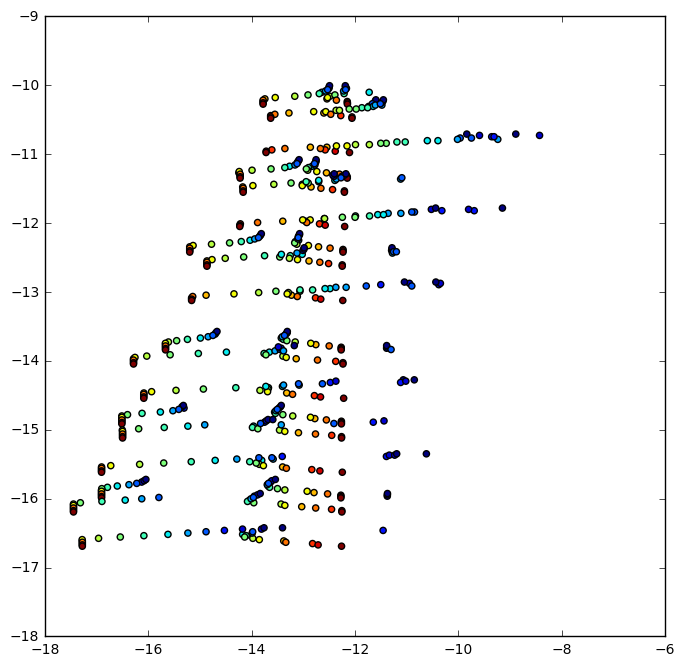

In [39]:
#plt.rcParams["figure.figsize"] = (8,8)
plt.scatter(df[:, 0], result.predict(), c=df[:, 3])
#plt.scatter(df[:, 3], df[:, 0])
#plt.scatter(df[:, 3], df[:, 0])
#len(result.predict())


In [ ]:
plt.plot(gridp, dist.lorenz(gridp))
plt.scatter(p, L)

In [ ]:
q01 = 0
q99 = truedist.quantile(0.999)
gridy = np.linspace(q01,q99,1000)

plt.plot(gridy, dist.pdf(gridy))
plt.plot(gridy, truedist.pdf(gridy), color="r")

In [ ]:
N = 100
P = 6
index = np.round(np.hstack((np.array(range(P-1)) * N/(P-1), N)))
index

In [55]:
import scipy
def inner(x):
    print(x)
    return 3 - np.round(x)


In [64]:
scipy.optimize.bisect(inner, 0, 10)

0.0
10.0
5.0
2.5
3.75
3.125


3.125

In [63]:
inner(4.75)

4.75


-2.0